(complejos)=
# Números complejos en Python.


Los números complejos juegan un papel predominante en en el lenguaje de computación cuántica, por ese motivo se ha creído conveniente abrir un apartado para hacer un resumen donde exponer los conocimientos que se necesitan sobre este tipo de números con la finalidad de que de esa manera se pueda entender mejor cómo funciona la computación cuántica.

Además de la exposición teórica, también se utilizará python como herramienta complementaria para que de esta manera el lector pueda trabajar con este tipo de números desde el lenguaje de programación que es la base de qiskit.  

Un número complejo $z$ es un número que posee una parte real y otra imaginaria, por ejemplo la siguiente expresión sería un número complejo:

$$z=x+iy$$

Cada una de las partes que conforman el número complejo se llaman *componentes*, la primera componente es la parte real ($\Re(z)=x$) y la segunda la imaginaria($\Im(z)=y$). Asi se tendrá $\Re(1+i\sqrt{3})=1$ y $\Im(1+i\sqrt{3})=\sqrt{3}$.

Hay que tener en cuenta que los números reales también se pueden considerar complejos pero sin parte imaginaria. Igualmente un número con sólo parte imaginaria, también será un número complejo.



Cuando se facilita un número complejo en el formato que se ha dado anteriormente ($z=x+iy$), se dice que el número complejo está dado en *forma cartesiana* o *forma rectangular*. En computación cuántica es más frecuente dar el número complejo en *forma polar*, es decir de la siguiente manera:

$$z=r\cdot e^{i\theta}$$

donde r es el módulo del número complejo y $e^{i\theta}$ es la fase compleja. Lógicamente cualquier número complejo puede ser expresado en uno u otro formato, para ello existen fórmulas de conversión entre estos formatos. Por ejemplo, si queremos pasar de forma cartesiana a polar se utilizarán las siguientes equivalencias.

$$r=\sqrt{x^2+y^2}$$
$$\theta=tan^{-1}(\frac{y}{x})$$

De manera recíproca, para pasar de polar a formato cartesiano, utilizaremos las siguientes equivalencias:

$$x=r\cdot cos\theta$$
$$y=r\cdot sen \theta$$

Podemos utilizar las siguientes funciones construidas con código python para hacer estas transformaciones

In [1]:
import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

```{index} cmath libreria
```

También existe la librería de python denominada <a href="https://docs.python.org/3/library/cmath.html" target="_blank"> cmath </a> que nos permite hacer este tipo de operaciones.

Los números complejos en python se pueden generar de la dos formas que a continuación se indican.

In [2]:
a = 3.5
b = 1.2
c = a + b*1j
print(c)
c2 = complex(a,b)
print(c2)

(3.5+1.2j)
(3.5+1.2j)


Con las expresiones anteriores, hay que tener en cuenta que el número complejo $i=\sqrt{-1}$ se representa en python mediante la letra $j$.

Utilizando numpy podemos obtener la parte real y la imaginaria de los números complejos.

In [3]:
print("parte real de c: {}".format(np.real(c)))
print("Parte imaginaria de c: {}".format(np.imag(c)))

parte real de c: 3.5
Parte imaginaria de c: 1.2




Dentro del campo de los números complejos, también hay que tener en cuenta la denominada fórmula de Euler que dice lo siguientes:

```{index} Euler fórmula
```

$$e^{i\theta}=cos \theta + i sen\theta $$

Todo número complejo tiene su representación en el plano cartesiano, como se puede ver en el siguiente gráfico:

![](images\representacion.PNG)

Teniendo en cuenta esa imagen, en una representación cartesiana, la parte real, $x$, se representa en el eje de abscisas, mientras que en el de ordenadas, se representa la parte imaginaria, $y$. Si tenemos el número en coordenadas polares, el ángulo $\theta$ de la figura, será el valor que acompaña al número i en el exponente, mientras que la longitud del segmento de la figura (r), será el valor de r.

A continuación se facilita un código python que facilita la representación gráfica de un número complejo, dado en coordenadas cartesianas.


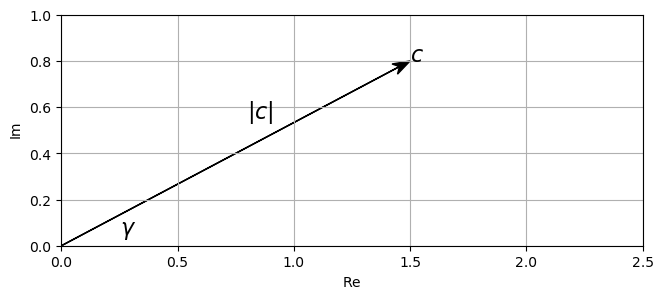

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

def generate_figure(figsize=(2, 2), xlim=[0, 1], ylim=[0, 1]):
    """Generate figure for plotting complex numbers

    Notebook: C2/C2_ComplexNumbers.ipynb

    Args:
        figsize: Figure size (Default value = (2, 2))
        xlim: Limits of x-axis (Default value = [0, 1])
        ylim: Limits of y-axis (Default value = [0, 1])
    """
    plt.figure(figsize=figsize)
    plt.grid()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(r'$\mathrm{Re}$')
    plt.ylabel(r'$\mathrm{Im}$')

def plot_vector(c, color='k', start=0, linestyle='-'):
    """Plot arrow corresponding to difference of two complex numbers

    Notebook: C2/C2_ComplexNumbers.ipynb

    Args:
        c: Complex number
        color: Color of arrow (Default value = 'k')
        start: Complex number encoding the start position (Default value = 0)
        linestyle: Linestyle of arrow (Default value = '-')

    Returns:
        arrow (matplotlib.patches.FancyArrow): Arrow
    """
    return plt.arrow(np.real(start), np.imag(start), np.real(c), np.imag(c),
                     linestyle=linestyle, head_width=0.05, fc=color, ec=color, overhang=0.3,
                     length_includes_head=True)

c = 1.5 + 0.8j

generate_figure(figsize=(7.5, 3), xlim=[0, 2.5], ylim=[0, 1])
v = plot_vector(c, color='k')

plt.text(1.5, 0.8, '$c$', size='16')
plt.text(0.8, 0.55, '$|c|$', size='16')
plt.text(0.25, 0.05, '$\gamma$', size='16');

La representación mediante coordenadas polares se haría de la siguiente manera.

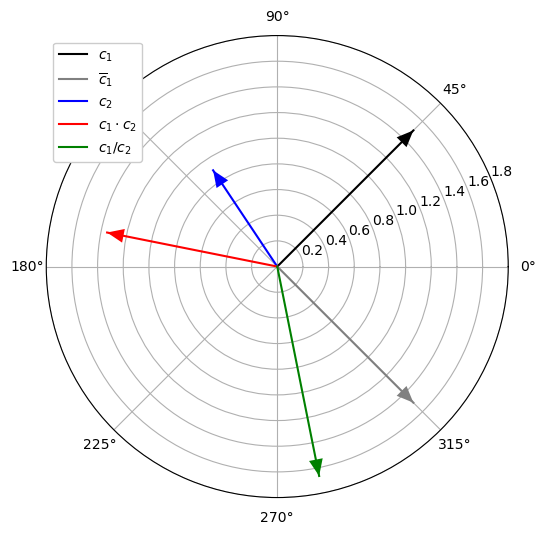

In [5]:
def plot_polar_vector(c, label=None, color=None, start=0, linestyle='-'):
    # plot line in polar plane
    line = plt.polar([np.angle(start), np.angle(c)], [np.abs(start), np.abs(c)], label=label, 
                     color=color, linestyle=linestyle)
    # plot arrow in same color
    this_color = line[0].get_color() if color is None else color
    plt.annotate('', xytext=(np.angle(start), np.abs(start)), xy=(np.angle(c), np.abs(c)),
                 arrowprops=dict(facecolor=this_color, edgecolor='none', 
                                 headlength=12, headwidth=10, shrink=1, width=0))

#head_width=0.05, fc=color, ec=color, overhang=0.3, length_includes_head=True    
    
c_abs = 1.5
c_angle = 45  # in degree
c_angle_rad = np.deg2rad(c_angle) 
a = c_abs * np.cos(c_angle_rad)
b = c_abs * np.sin(c_angle_rad)
c1 = a + b*1j    
c2 = -0.5 + 0.75*1j

plt.figure(figsize=(6, 6))
plot_polar_vector(c1, label='$c_1$', color='k')
plot_polar_vector(np.conj(c1), label='$\overline{c}_1$', color='gray')
plot_polar_vector(c2, label='$c_2$', color='b')
plot_polar_vector(c1*c2, label='$c_1\cdot c_2$', color='r')
plot_polar_vector(c1/c2, label='$c_1/c_2$', color='g')

plt.ylim([0, 1.8]);
plt.legend(framealpha=1);


## Otras cuastiones de los número complejos.

Hay otros aspectos de los números complejos que el lector debe tener en cuenta.

### Complejo conjugado.

Son también números complejos que se obtienen cambiando de signo la parte imaginaria de otro número complejo. De esta manera si tenemos un número complejo $z=x+iy$, su conjugado será $z^{*}=x-iy$. Si el número complejo lo tenemos en forma polar ($z=r\cdot e^{i\theta}$), entonces su conjugado será $z^{*}=re^{-i\theta}$ 

### Norma de un número complejo.

La norma de un número complejo es el valor de r cuando éste está escrito en forma polar. Si lo tenemos escrito en formato cartesiano la norma se calcula de la siguiente manera:

$$|r|=\sqrt(x^2+y^2)$$

Una forma fácil de calcular la norma elevada al cuadrado de un número complejo es multiplicando ese numero por cu conjugado:

$$|z|^{2}=z^{*}\cdot z=z \cdot z^{*}$$

## Multiplicación de matrices de números complejos.

En el campo de la computación cuántica es muy frecuente tener la necesidad de multiplicar matrices de números complejos, en particular cuando se tienen matrices que representan ciertas puertas lógicas, que se verán a lo largo de este trabajo.

Para hacer este tipo de operaciones matriciales utilizaremos la clase de numpy denominada *matmul*, vemos a continuación un ejemplo.. 

In [6]:
a = np.array([[complex(1,2),complex(-1,1)],[2,complex(2,1)]])
print(a)

[[ 1.+2.j -1.+1.j]
 [ 2.+0.j  2.+1.j]]


In [7]:
b= np.array([[complex(2,1),complex(0.5,1)],[complex(1,3),complex(-2,2)]])
print(b)

[[ 2. +1.j  0.5+1.j]
 [ 1. +3.j -2. +2.j]]


In [8]:
# Multiplicamos las matrices 
np.matmul(a,b)

array([[-4. +3.j, -1.5-2.j],
       [ 3. +9.j, -5. +4.j]])

In [9]:
# También las podemos multiplicar de la siguiente manera
a@b

array([[-4. +3.j, -1.5-2.j],
       [ 3. +9.j, -5. +4.j]])

## Producto de Kronecker.

```{index} Kronecker product
```

Este tipo de multiplicación de matrices, también es un elemento muy importante cuando se estudian dos o más qubits en la computación cuántica. Este tipo de producto se puede definir de la siguiente manera.

![](images/kroneker.PNG)

En concreto se tiene lo siguiente:

![](images/kroneker2.PNG)

Para hacer esta operación, numpy también nos facilita mucho la tarea, veamos cómo mediante el siguiente ejemplo:

In [10]:
a=np.array([[0],[1]])
a

array([[0],
       [1]])

In [11]:
b= np.array([[1],[0]])
b

array([[1],
       [0]])

In [12]:
# El producto de Kronecker será
np.kron(a,b)

array([[0],
       [0],
       [1],
       [0]])

Si tuviéramos que multiplicar tres matrices con este procedimiento, lo haríamos de la siguiente manera 

In [13]:
c= np.array([[1],[0]])
c

array([[1],
       [0]])

Veamos cual sería el valor de 

$$c\otimes b \otimes a$$

In [14]:
np.kron(c,np.kron(b,a))

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

Notar que lo anterior se ha podido hacer porque el producto de Kronecker (también llamado producto tensorial) tiene la propiedad asociativa, pero no la conmutativa.

## Apéndice sobre los números complejos con Python.

En este apartado se va a mostrar una serie de detalles importantes para  poder trabajar con solidez y soltura los números complejos en python.

La forma más rápida de definir un número complejo en Python es escribiendo su literal directamente en el código fuente:

In [15]:
z= 3+2j

Aunque parece una fórmula algebraica, la expresión a la derecha del signo igual ya es un valor fijo que no necesita mayor evaluación. Cuando verifiques su tipo, confirmarás que efectivamente es un número complejo:

In [16]:
type(z)

complex

Como bien se puede observar para que python reconozca que queremos definir un número complejo, es necesario añadir la letra "j" a continuación del segundo número.

Veamos a continuación lo que ocurre cuando se introduce más términos en la suma.

In [17]:
3+2j+5+6j+4j

(8+12j)

Podemos observar que python es lo suficientemente listo como para discriminar la parte real de la imaginaria y así hacer las suma correctamente. 

Otra forma de generar número complejos es utilizar una función incorporada en Python denominada *complex()* que se puede usar como alternativa a la forma presentada anteriormente.

In [18]:
z=complex(3,2)
print(z)

(3+2j)


De esta forma, se parece a una tupla o a un par ordenado de números ordinarios. La analogía no es tan descabellada, pues como bien es sabido, los números complejos tienen una interpretación geométrica en el sistema de coordenadas cartesiano. Puedes pensar en los números complejos como número bidimensionales.

La función de *complex()* de números complejos acepta dos parámetros numéricos. El primero representa la parte real , mientras que el segundo representa la parte imaginaria denotada con la letra j del literal que viste antes:

In [19]:
complex(3, 2) == 3 + 2j

True

A la función *complex()* se le puede pasar como argumento un literal ( conteniendo la expresión de un número complejo) y python lo entenderá perfectamente (ojo, la cadena no puede contener ningún espacio en blanco).

In [20]:
complex("3+5j")

(3+5j)

In [21]:
type(complex(3+5j))

complex

Para acceder a la parte real e imaginaria de los número complejos en python, se deberá actuar de la siguiente manera

In [23]:
z= 4+5j
print("número complejo:",z)
z1=z.real
print("parte real: ",z1)
z2 = z.imag
print("parte imaginaria: ",z2)

número complejo: (4+5j)
parte real:  4.0
parte imaginaria:  5.0


Ambas propiedades son de solo lectura porque los números complejos son inmutables, por lo que intentar asignar un nuevo valor a cualquiera de ellos fallará:

In [25]:
z.real = 4.57

AttributeError: readonly attribute

El conjugado de un número complejo se puede obtener de la siguiente manera:

In [26]:
z= 4+5j
z.conjugate()

(4-5j)

Dado que *complex()* es un tipo de datos nativo en Python, puede conectar números complejos en expresiones aritméticas y llamar a muchas de las funciones integradas en ellas. Las funciones más avanzadas para números complejos se definen en el  <a href="https://docs.python.org/es/3/library/cmath.html" target="_blank"> módulo cmath </a>, que forma parte de la biblioteca estándar de python.

Además de las sumas, restas, multiplicaciones y divisiones, que se realizan de forma tradicional como con otros tipos numéricos, también se permite la exponenciación tal y como se puede comprobar en los siguientes ejemplos:

In [27]:
z=4+2j
2**z

(2.9353115958928275+15.7284438465799j)

In [28]:
z**0.5

(2.0581710272714924+0.48586827175664565j)

In [29]:
z**z

(21.758716390823256-156.74592048155935j)

### Módulo cmatch

Como ya se ha indicado anteriormente, este módulo permite realizar operaciones con números complejos, imposibles de hacer con las funciones que por defecto tiene definido python. Algunas de estas funcionalidades, las vamos a exponer en el presente apartado.

Con este módulo podemos obtener la raíz cuadrada de números negativos, como por ejemplo

In [31]:
import cmath,math

cmath.sqrt(-1)

1j

Para poder extraer todas las raices cuadradas debemos hacer lo siguiente

In [39]:
cmath.sqrt(complex(-2.0,0.0))

1.4142135623730951j

In [41]:
cmath.sqrt(complex(-2.0,-0.0))

-1.4142135623730951j

Pero como podemos observar por defecto no nos devuelve todas las raíces cuadradas, es decir no vamos a poder extraer todas las raíces de una ecuación de una sola vez, como por ejemplo las del polinomio siguiente $x^4+1$. Para poder obtener todas esas raíces se utiliza el paquete denominado numpy, y se haría para este caso de la siguiente manera:

In [32]:
import numpy as np

np.roots([1,0,0,0,1]) # son los coeficientes del polinomio anterior

array([-0.70710678+0.70710678j, -0.70710678-0.70710678j,
        0.70710678+0.70710678j,  0.70710678-0.70710678j])

Puede resultar útil conocer las distintas formas de números complejos y sus sistemas de coordenadas. Como se puede ver, estas distintas formas ayudan a resolver problemas prácticos como por ejemplo  encontrar raíces complejas. En consecuencia, en la siguiente sección, se profundizará más en estos detalles.

### Conversión entre coordenadas rectangulares y polares.

Como ya es sabido, un número complejo admite diferentes formas de representación. Una es la denominada forma binómica, que es la que se ha visto anteriormente, y otra la polar que estaría definida por el módulo del complejo ( distancia al origen) y el ángulo que se forma con el eje de abcisas, como se puede ver en la siguiente figura:

![image.png](images/complejopolar.PNG)

La propiedad que permite pasar un número complejo en forma binómica a forma polar es *polar*. Veamos el siguiente ejemplo.
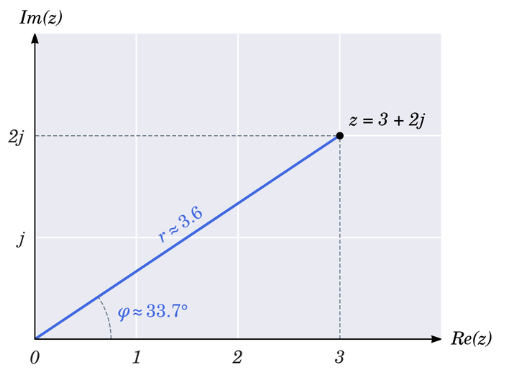

In [33]:
z=2+3J
cmath.polar(z)

(3.605551275463989, 0.982793723247329)

El resultado que se nos devuelve en una tupla, donde el primer elemento es el módulo del complejo y el segundo el ángulo o la fase de ese número. Estos datos se pueden obtener también de la siguiente manera:

In [36]:
modulo = abs(z)
print("El valor del módulo es: ", modulo)
fase = cmath.phase(z)
print("La fase del número es: ", fase)

El valor del módulo es:  3.605551275463989
La fase del número es:  0.982793723247329


Para hacer la conversión inversa deberemos utilizar el método rect()*:

In [42]:
z = 2+3J
z2 = cmath.polar(z)
z3 = cmath.rect(z2[0],z2[1])
print(z3)

(2+2.9999999999999996j)


Observar que el primer parámetro que se pasa a la función es el módulo del número complejo y de segundo la fase del mismo.

Existen diferentes formatos para representar los números complejos. Algunas de estas formas, son las siguientes:

* Algebraico

* Geométrico

* Trigonométrico

* exponencial

A continuación se muestra un código que sirve para ilustrar algunas instrucciones de Python para trabajar con estos formatos diferentes de números complejos.

In [43]:
import cmath

algebraic = 3 + 2j
geometric = complex(3, 2)
radius, angle = cmath.polar(algebraic)
trigonometric = radius * (cmath.cos(angle) + 1j*cmath.sin(angle))
exponential = radius * cmath.exp(1j*angle)

for number in algebraic, geometric, trigonometric, exponential:
    print(format(number, "g"))

3+2j
3+2j
3+2j
3+2j


Existe una notación que se utiliza mucho dentro del mundo de la programación cuántica, y esa expresión consiste en utilizar notación exponencial, y en concreto la denominada fórmula de Euler, que dice lo siguiente:

$$e^{i\theta}=cos(\theta)+i\cdot sen(\theta)$$

Así por ejemplo $e^{i\pi}=cos(\pi)+i\cdot sen(\pi)=-1+0\cdot i$. Veamos cómo expresar lo anterior, desde un punto de vista de código python


In [46]:
cmath.exp(1j*np.pi)

(-1+1.2246467991473532e-16j)

In [ ]:
Comprobmeos que la parte real debe ser -1 y la imaginaria 0.

In [49]:
cmath.cos(np.pi)

(-1-0j)

In [50]:
cmath.sin(np.pi)

(1.2246467991473532e-16-0j)

## Razones trigonométricas de angulos usuales.

Por último y para terminar este apartado recordemos el valor de las funciones trigonométrica de los ángulos más utilizados:

![image.png](images/angulosnotables.PNG)
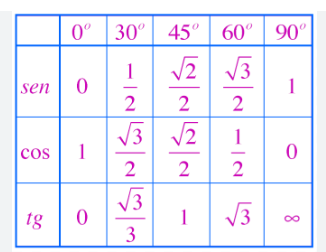